In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
newdata = pd.get_dummies(dataset,columns = ["Gender"])
newdata.columns
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
User ID            400 non-null int64
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
Gender_Female      400 non-null uint8
Gender_Male        400 non-null uint8
dtypes: int64(4), uint8(2)
memory usage: 13.4 KB


In [5]:
X =  newdata[['Gender_Female','Age','EstimatedSalary']]
y =  dataset['Purchased']

In [6]:
X.info()
X.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Gender_Female      400 non-null uint8
Age                400 non-null int64
EstimatedSalary    400 non-null int64
dtypes: int64(2), uint8(1)
memory usage: 6.7 KB


Index(['Gender_Female', 'Age', 'EstimatedSalary'], dtype='object')

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
X.shape

(400, 3)

In [9]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0, stratify = y)


# 1. KNN

In [10]:
# Create your classifier here

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, p = 2)
# Fitting classifier to the Training set
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
report = classification_report(y_test, y_pred)
print(report)

#precision = TP/(TP+FP)
print("pre_0 {0:.2f}".format(78/(78+7)))
print("pre_1 {0:.2f}".format(41/(41+8)))

#recall = TP / (TP + FN)
print("recall_0 {0:.2f}".format(78/(78+8)))
print("recall_1 {0:.2f}".format(41/(41+7)))

#Micro
print("micro {0:.2f}".format((78+41)/(78+41+7+8)))

#Macro
print("macro {0:.2f}".format((0.92+0.84)/2))

#Weighted
print("weighted {0:.2f}".format(86/134*0.92+48/134*0.84))

[[78  8]
 [ 7 41]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        86
           1       0.84      0.85      0.85        48

   micro avg       0.89      0.89      0.89       134
   macro avg       0.88      0.88      0.88       134
weighted avg       0.89      0.89      0.89       134

pre_0 0.92
pre_1 0.84
recall_0 0.91
recall_1 0.85
micro 0.89
macro 0.88
weighted 0.89


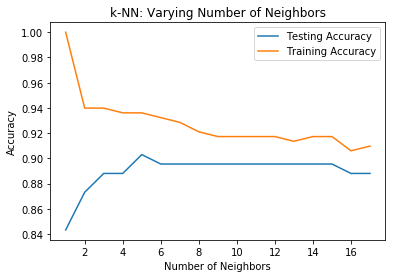

In [12]:
import numpy as np

###Overfitting and underfitting

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 18)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure()
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 2. Linear SVM

In [13]:
from sklearn.svm import SVC # "Support vector classifier"
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
# Predicting the Test set results
y_pred = linear_svm.predict(X_test)

In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        86
           1       0.76      0.60      0.67        48

   micro avg       0.79      0.79      0.79       134
   macro avg       0.78      0.75      0.76       134
weighted avg       0.79      0.79      0.78       134



## 3. Kernal SVM

### 3.1 Poly Kernal

In [15]:
kernal_poly = SVC(kernel='poly',degree=3)
kernal_poly.fit(X_train, y_train)
# Predicting the Test set results
y_pred = kernal_poly.predict(X_test)

In [16]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        86
           1       0.81      0.60      0.69        48

   micro avg       0.81      0.81      0.81       134
   macro avg       0.81      0.76      0.77       134
weighted avg       0.81      0.81      0.80       134



### 3.2 Gaussian Kernel

In [17]:
kernal_rbf = SVC(kernel='rbf')
kernal_rbf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = kernal_rbf.predict(X_test)

In [18]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        86
           1       0.80      0.90      0.84        48

   micro avg       0.88      0.88      0.88       134
   macro avg       0.87      0.88      0.87       134
weighted avg       0.89      0.88      0.88       134



## 4. Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = nb_clf.predict(X_test)

In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        86
           1       0.81      0.79      0.80        48

   micro avg       0.86      0.86      0.86       134
   macro avg       0.85      0.84      0.85       134
weighted avg       0.86      0.86      0.86       134



## 5. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf_dt.predict(X_test)

In [26]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        86
           1       0.78      0.79      0.78        48

   micro avg       0.84      0.84      0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134



In [27]:
features = ['Gender_Female', 'Age', 'EstimatedSalary']
targets = ['Yes','No']
from sklearn import tree
# Vizualization of Decision Tree Classifier
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(
    decision_tree=clf_dt,
    out_file=dot_data,
    feature_names=features,
    class_names=targets,
    filled=True,
    rounded=True,
    impurity=True
)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("social.pdf")

## 6. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = rf.predict(X_test)
print("training accuracy: {:.3f}".format(rf.score(X_train,y_train)))
print("testing accuracy: {:.3f}".format(rf.score(X_test,y_test)))

training accuracy: 1.000
testing accuracy: 0.873


In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        86
           1       0.80      0.85      0.83        48

   micro avg       0.87      0.87      0.87       134
   macro avg       0.86      0.87      0.86       134
weighted avg       0.88      0.87      0.87       134



## 7. Voting Classifier

In [30]:
from sklearn.ensemble import VotingClassifier

In [31]:
# Instantiate individual classifiers
SEED = 1
rf = RandomForestClassifier(n_estimators = 300)
knn = KNeighborsClassifier(n_neighbors = 3, p = 2)
dt = DecisionTreeClassifier(random_state = SEED)
nb = GaussianNB()
kernal_rbf = SVC(kernel='rbf')
kernal_poly = SVC(kernel='poly',degree=3)
linear_svm = SVC(kernel='linear')

#Define a list called classifier that contains
#the tuples (classifier_name, classifier)
classifiers = [('Random Forest',rf),
               ('K Nearest Neighbours',knn),
               ('Classification Tree',dt),
               ('Naive',nb),
               ('RBF',kernal_rbf),
               ('POLY',kernal_poly),
               ('SVM',linear_svm)]

#Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
#Fit 'vc' to the train set
vc.fit(X_train,y_train)
#Predict test set labels
y_pred = vc.predict(X_test)

In [32]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        86
           1       0.82      0.85      0.84        48

   micro avg       0.88      0.88      0.88       134
   macro avg       0.87      0.87      0.87       134
weighted avg       0.88      0.88      0.88       134



### A  <mark>macro-average</mark> will compute the metric independently for each class and then take the average (hence treating all classes equally),

### <mark>micro-average</mark> will aggregate the contributions of all classes to compute the average metric

## 8. Bagging

In [64]:
from sklearn.ensemble import BaggingClassifier
# Instantiate a classifier KNN
knn = KNeighborsClassifier(n_neighbors = 3, p = 2)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=knn, n_estimators = 100,
                       n_jobs=-1)

In [65]:
#Fit 'bc' to the train set
bc.fit(X_train,y_train)
#Predict test set labels
y_pred = bc.predict(X_test)

In [66]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        86
           1       0.84      0.85      0.85        48

   micro avg       0.89      0.89      0.89       134
   macro avg       0.88      0.88      0.88       134
weighted avg       0.89      0.89      0.89       134

